In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

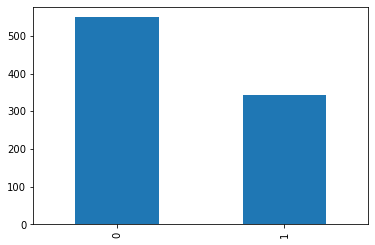

In [3]:
# Step 2 - bar plot for surviving passengers
df['Survived'].value_counts().plot.bar()



[[Text(0, 0, 'No'), Text(1, 0, 'Yes')]]

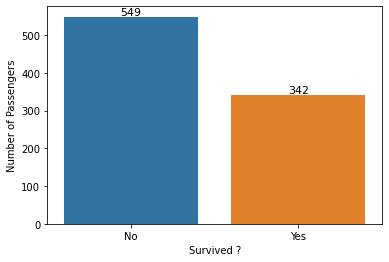

In [4]:
# Step 2 - Alternative Solution
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x="Survived", data=df)
ax.set(xlabel='Survived ?', ylabel='Number of Passengers')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 11, color="black")
ax.set(xticklabels=["No", "Yes"])

In [5]:
# Step 3 - Percentage of Survived 1st class from all first class 
df.loc[(df['Pclass'] == 1) & (df['Survived']==1)].shape[0] / df.loc[(df['Pclass'] == 1)].shape[0]



0.6296296296296297

In [6]:
# example Data Frame groupby
#sum_df = df.loc[df['Pclass']==1].groupby('Survived').describe()
#sum_df.loc[sum_df.index == 1]

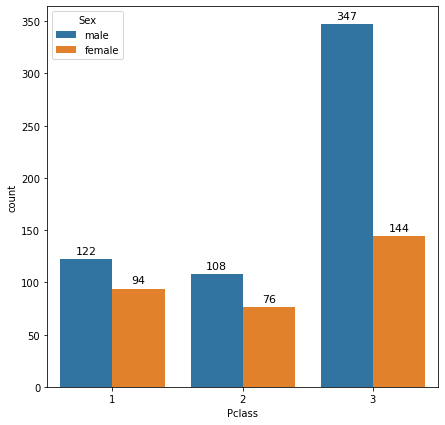

In [7]:
# Step 4 - bar plot sex/class
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
ax = sns.countplot(x="Pclass", hue="Sex", data=df)
#plt.gcf().set_facecolor('white')
# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 11, color="black")


<AxesSubplot:xlabel='Age', ylabel='Count'>

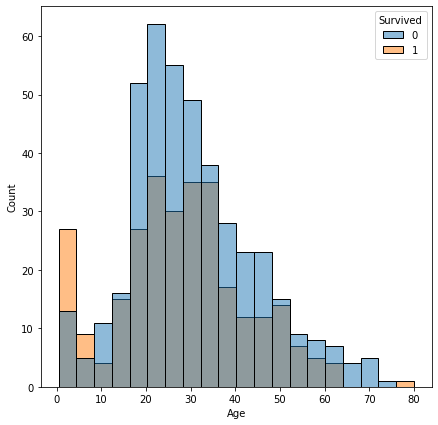

In [8]:
# Step 5 - Histogram of age Distribution. Compare survived/not-survived
plt.figure(figsize=(7,7))
sns.histplot(data=df, x="Age", hue='Survived')


In [9]:
# Step 6 - average age for survived and drowned passengers separately
age_survived = df.loc[df['Survived']==1, 'Age'].mean()
age_drowned = df.loc[df['Survived']==0, 'Age'].mean()
print('Average Age of Survived', age_survived, 'Average Age of Drowned', age_drowned)


Average Age of Survived 28.343689655172415 Average Age of Drowned 30.62617924528302


In [10]:
# Step 7 - Replace missing age values by the mean age.
df['Age'] = df['Age'].fillna(df['Age'].mean())

<AxesSubplot:>

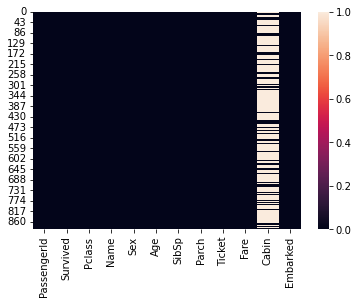

In [11]:
# way to check NaN values
sns.heatmap(df.isna())

In [12]:
df['Age'].isna().sum()

0

In [13]:
# Step 8 - table counting number of surviving/dead separately for 1st/2nd/3rd class and male/female.
df.groupby(['Pclass', 'Sex', 'Survived'])['Survived'].count()



Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64